In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '../../00_Data_Input/relabelled_data_ksa_explore.csv'

try:
    df = pd.read_csv(file_path)
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file: {e}")
    
df_len = len(df)

In [3]:
vh_var = [f"VH_{i}" for i in range(31)]
rf_var = [f"F{i+1}" for i in range(17)]

In [4]:
df.head()

,idpoint,idsubsegment,idsegment,nth,periode,observation,MGRS,VH_0,VH_1,VH_2,...,F12,F13,F14,F15,F16,F17,class,bulan,tahun,idkab
0,320101008b1#01,320101008b1,320101008,9,2022_30,6.0,48MYU,-1387,-1368,-1351,...,1.000000,0.785398,-31.000000,-1.538549,-217.9999999999,-1.5662092030054973,NP,9,2022,3201
1,320101008b1#01,320101008b1,320101008,10,2023_03,6.0,48MYU,-1434,-1415,-1377,...,1.000000,0.785398,-18.777778,-1.517592,-232.9999999999,-1.5665045076528836,NP,10,2023,3201
2,320101008b2#01,320101008b2,320101008,4,2022_18,6.0,48MYU,-948,-1098,-1398,...,105.600000,1.561327,1.000000,0.785398,440.0000000001,1.5685236034352557,NP,4,2022,3201
3,320101008b2#01,320101008b2,320101008,5,2022_20,5.0,48MYU,-1424,-1248,-948,...,7.428571,1.436985,-238.000000,-1.566595,-83.9999999999,-1.5588921272365726,PL,5,2022,3201
4,320101008b2#01,320101008b2,320101008,12,2023_07,6.0,48MYU,-1479,-1438,-1356,...,10.600000,1.476735,-61.500000,-1.554538,-100.9999999999,-1.5608956602068982,NP,12,2023,3201


In [153]:
df['observation'] = df.observation.astype(np.int32)
Y = df['observation']

# bs = backscatter, rf = ready feature
df_bs = df[vh_var]
df_rf = df[rf_var]

In [164]:
bs_var_count = len(vh_var)
df_bs.columns = [i for i in range(bs_var_count)]

lvl1_index = []
for i in range(df_len):
    lvl1_index += [i] * bs_var_count

df_bs_index = [
    np.array(lvl1_index),
    np.array(list(df_bs.columns)*df_len)
]

df_bs_ready = pd.DataFrame(df_bs.to_numpy().flatten(), index=df_bs_index)
df_bs_ready = df_bs_ready.astype(np.float64)
df_bs_ready.columns = ['dim_0']
df_bs_ready = convert(df_bs_ready, to_type="nested_univ", from_type="pd-multiindex")

In [165]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_temp, Y_train, Y_temp = train_test_split(df_bs_ready, Y, test_size=0.2, random_state=42, stratify=Y)

In [167]:
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.sklearn import RotationForest
from sktime.datasets import load_unit_test

clf = HIVECOTEV2(
    stc_params={
        "estimator": RotationForest(n_estimators=3),
        "n_shapelet_samples": 100,
        "max_shapelets": 10,
        "batch_size": 20,
    },
    drcif_params={"n_estimators": 2, "n_intervals": 2, "att_subsample_size": 2},
    arsenal_params={"num_kernels": 50, "n_estimators": 3},
    tde_params={
        "n_parameter_samples": 10,
        "max_ensemble_size": 3,
        "randomly_selected_params": 5,
    },
)
clf.fit(X_train, np.array(Y_train).astype('<U1'))
y_pred = clf.predict(X_temp)

/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/data/home/ranu.yulianto/.local/lib/python3.10/site-

In [226]:
[f"VH_{i}" for i in range(30, -1, -1)]

['VH_30',
 'VH_29',
 'VH_28',
 'VH_27',
 'VH_26',
 'VH_25',
 'VH_24',
 'VH_23',
 'VH_22',
 'VH_21',
 'VH_20',
 'VH_19',
 'VH_18',
 'VH_17',
 'VH_16',
 'VH_15',
 'VH_14',
 'VH_13',
 'VH_12',
 'VH_11',
 'VH_10',
 'VH_9',
 'VH_8',
 'VH_7',
 'VH_6',
 'VH_5',
 'VH_4',
 'VH_3',
 'VH_2',
 'VH_1',
 'VH_0']

In [227]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numba
from sktime.datatypes import convert
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.sklearn import RotationForest
from sktime.classification.model_selection import TSCGridSearchCV

def build_model():
    return create_hive_model()

def create_hive_model():
    model = HIVECOTEV2(
        stc_params={
            "estimator": RotationForest(n_estimators=3),
            "n_shapelet_samples": 100,
            "max_shapelets": 10,
            "batch_size": 20,
        },
        drcif_params={"n_estimators": 2, "n_intervals": 2, "att_subsample_size": 2},
        arsenal_params={"num_kernels": 50, "n_estimators": 3},
        tde_params={
            "n_parameter_samples": 10,
            "max_ensemble_size": 3,
            "randomly_selected_params": 5,
        },
    )
    
    return model

def prepare_data(file_path, train_test_val_ratio):
    try:
        df = pd.read_csv(file_path)
    except pd.errors.ParserError as e:
        print(f"Error parsing the CSV file: {e}")
        return None
        
    vh_var = [f"VH_{i}" for i in range(30, -1, -1)]
    # rf_var = [f"F{i+1}" for i in range(17)]
    df['observation'] = df.observation.astype(np.int32)
    Y = df['observation']
    
    # bs = backscatter, rf = ready feature
    df_bs = df[vh_var]
    # df_rf = df[rf_var]

    df_len = len(df)
    bs_var_count = len(vh_var)
    df_bs.columns = [i for i in range(bs_var_count)]
    
    lvl1_index = []
    for i in range(df_len):
        lvl1_index += [i] * bs_var_count
    
    df_bs_index = [
        np.array(lvl1_index),
        np.array(list(df_bs.columns)*df_len)
    ]
    
    df_bs_ready = pd.DataFrame(df_bs.to_numpy().flatten(), index=df_bs_index)
    df_bs_ready = df_bs_ready.astype(np.float64)
    df_bs_ready.columns = ['dim_0']
    df_bs_ready = convert(df_bs_ready, to_type="nested_univ", from_type="pd-multiindex")
    
    len_of_arr = len(train_test_val_ratio)
    data_ratio = sum(train_test_val_ratio)
    if data_ratio != 1:
        print("Jumlah rasio data tidak sama dengan 1")
        return None
    
    if len_of_arr == 2:
        return split_train_test(df_bs_ready, Y, train_test_val_ratio, True, 77)
    elif len_of_arr == 3:
        return split_train_test_eval(df_bs_ready, Y, train_test_val_ratio, True)
    else:
        print('Data hanya bisa dibagi menjadi 2 atau 3.')
        return None

def split_train_test(X, Y, ratio, stratify=False, random_state=0):
    if stratify:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ratio[1], random_state=random_state, stratify=Y)
    else:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ratio[1], random_state=random_state)
    return X_train, X_test, Y_train, Y_test

def split_train_test_eval(X, Y, ratio, stratify=False, random_state=0):
    if stratify:
        X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=sum(ratio[1:]), random_state=random_state, stratify=Y)
        X_test, X_eval, Y_test, Y_eval = train_test_split(X, Y, test_size=ratio[2]/sum(ratio[1:]), random_state=random_state, stratify=Y)
    else:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ratio[1], random_state=random_state)
        X_test, X_eval, Y_test, Y_eval = train_test_split(X, Y, test_size=ratio[2]/sum(ration[1:]), random_state=random_state)
    return X_train, X_test, X_eval, Y_train, Y_test, Y_eval

def plot_confusion_matrix(cm, classes, title, dataset_name):
    plt.figure(figsize=(8, 8))
    percentages = (cm.T / cm.sum(axis=1) * 100).T
    plt.imshow(percentages, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=100)
    plt.title(f'Confusion Matrix - {title} - {dataset_name}')
    plt.colorbar(label='Percentage')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f"{cm[i, j]}\n{percentages[i, j]:.1f}%", horizontalalignment='center',
                     color='white' if percentages[i, j] > 50 else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.close()

def prepare_param_grid(stc_param_grid=None, drcif_param_grid=None, arsenal_param_grid=None, tde_param_grid=None):
    if stc_param_grid:
        stc_params = ansemble_params(stc_param_grid)

    if drcif_param_grid:
        drcif_params = ansemble_params(drcif_param_grid)

    if arsenal_param_grid:
        arsenal_params = ansemble_params(arsenal_param_grid)

    if tde_param_grid:
        tde_params = ansemble_params(tde_param_grid)
    
    return {
        'stc_params': stc_params,
        'drcif_params': drcif_params,
        'arsenal_params': arsenal_params,
        'tde_params': tde_params
    }

def plot_class_distribution(y, title='Class Distribution'):
    plt.figure(figsize=(10, 6))
    sns.histplot(y, kde=False, bins=len(set(y)), color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Kelas')
    plt.ylabel('Frekuensi')
    plt.xticks(ticks=sorted(set(y)))
    plt.grid(True)
    plt.show()

def ansemble_params(dict_of_params, params = None, curr_position = None):
    keys = list(dict_of_params.keys())
    len_each_params = [len(dict_of_params[k])-1 for k in keys]

    if params==None:
        params = []
    if curr_position == None:
        curr_position = [0] * len(keys)

    temp = {}
    for i in range(len(keys)):
        temp[keys[i]] = dict_of_params[keys[i]][curr_position[i]]
    params.append(temp)

    if (curr_position == len_each_params) or (len_each_params==[0]*len(keys)):
        return params
    else:
        next_position = moving_position(curr_position, len_each_params)
        return ansemble_params(dict_of_params, params, next_position) 

def moving_position(curr_position, len_each_params):
    next_position = curr_position
    for i in range(len(len_each_params)-1, -1, -1):
        if curr_position[i] == len_each_params[i]:
            continue
        next_position[i] = next_position[i]+1
        next_position[i+1:] = [0] * len(next_position[i+1:])
        return next_position
    return curr_position

def modeling(file_path, model_name, train_test_val_ratio):
    X_train, X_test, y_train, y_test = prepare_data(file_path, [0.8, 0.2])
    param_grid = prepare_param_grid(
        stc_param_grid={
            "estimator": [RotationForest(n_estimators=3)],
            "n_shapelet_samples": [100],
            "max_shapelets": [10],
            "batch_size": [20],
        },
        drcif_param_grid={"n_estimators": [2], "n_intervals": [2], "att_subsample_size": [2]},
        arsenal_param_grid={"num_kernels": [50], "n_estimators": [3]},
        tde_param_grid={
            "n_parameter_samples": [10],
            "max_ensemble_size": [3],
            "randomly_selected_params": [5],
        }
    )
    
    clf = HIVECOTEV2()
    grid = TSCGridSearchCV(estimator=clf, param_grid=param_grid, scoring=['accuracy', 'f1_micro', 'f1_macro'], refit='accuracy', n_jobs=8, cv=5)
    
    return grid

In [196]:
file_path = '../../00_Data_Input/relabelled_data_ksa_explore.csv'
train_test_ratio = [0.8, 0.2]

In [198]:
grid.fit(X_train, y_train)

/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/data/home/ranu.yulianto/.local/lib/python3.10/site-

TSCGridSearchCV(cv=10, estimator=HIVECOTEV2(), n_jobs=8,
                param_grid={'arsenal_params': [{'n_estimators': 3,
                                                'num_kernels': 50}],
                            'drcif_params': [{'att_subsample_size': 2,
                                              'n_estimators': 2,
                                              'n_intervals': 2}],
                            'stc_params': [{'batch_size': 20,
                                            'estimator': RotationForest(n_estimators=3),
                                            'max_shapelets': 10,
                                            'n_shapelet_samples': 100}],
                            'tde_params': [{'max_ensemble_size': 3,
                                            'n_parameter_samples': 10,
                                            'randomly_selected_params': 5}]},
                refit='accuracy', scoring=['accuracy', 'f1_micro', 'f1_macro'])

In [216]:
prediction_proba = grid.predict_proba(X_test)
prediction = grid.predict(X_test)

/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


In [220]:
prediction = grid.predict(X_test)

/data/home/ranu.yulianto/.local/lib/python3.10/site-packages/sktime/transformations/panel/catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.54      0.58      0.56       124
           2       0.48      0.35      0.40       100
           3       0.56      0.67      0.61       155
           4       0.53      0.66      0.59       185
           5       0.41      0.44      0.43       104
           6       0.48      0.32      0.38        47
           7       0.00      0.00      0.00        17

    accuracy                           0.51       767
   macro avg       0.37      0.38      0.37       767
weighted avg       0.48      0.51      0.49       767



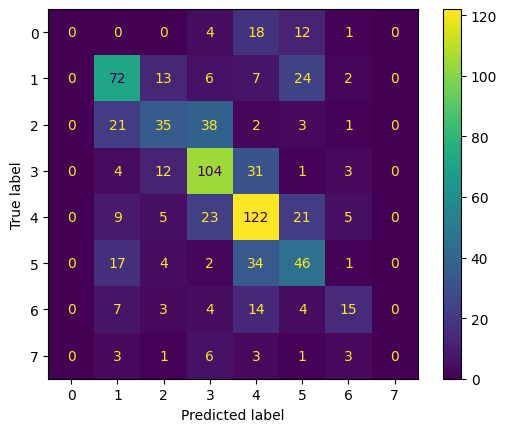

In [230]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, prediction, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, prediction)).plot()
plt.show()